In [1]:
train_time = 1
param_num = 450340
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 
comm_time = param_num * 4 / comm_bandwidth
fwdgrad_time_per_round = train_time*15 + comm_time*15
fedsgd_time_per_round = train_time*8*15 + comm_time*15*2
fedavg_time_per_round = train_time*8*15 + comm_time*1*2
fwdgrad_time_per_round /= 60
fedsgd_time_per_round /= 60
fedavg_time_per_round /= 60

In [4]:
comm_time

1.37432861328125

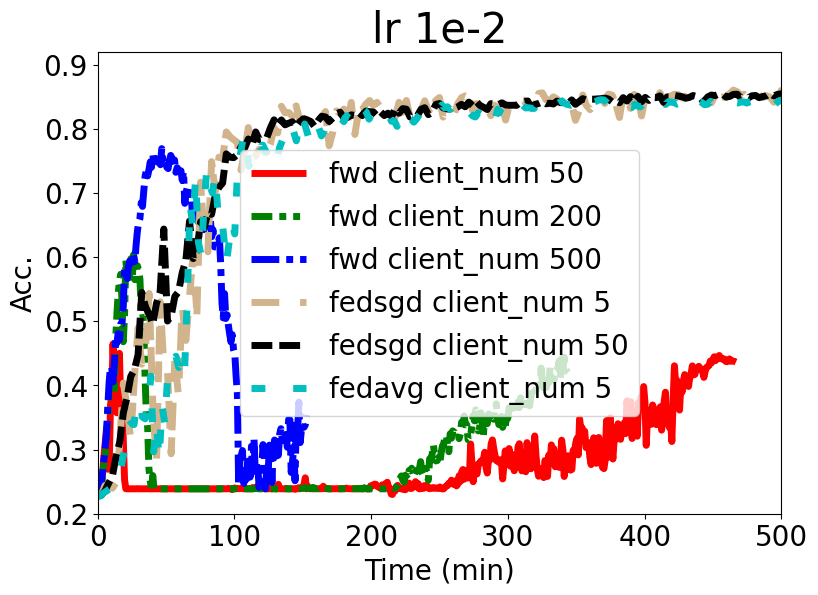

In [3]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 5
bwd_num_client_list = [5, 50]
fwd_num_client_list = [50, 200, 500]
model_list = ["vgg16"]
freeze_layers = ["e", "e,0", "e,0,1", "e,0,1,2", "e,0,1,2,3", "e,0,1,2,3,4", "e,0,1,2,3,4,5"]
# normal_method_list = ["kaiming_normal", "xavier_normal"]
learning_rate_list = ["1e-2"]
for model in model_list:
    # for method in normal_method_list:
    k = 1
    plt.figure(figsize=(30, 6),dpi=100)
    for lr in learning_rate_list:
        plt.subplot(1,3,k)
        k += 1
        acc_lists = []
        for i,client_num in enumerate(fwd_num_client_list):
            acc = []
            with open(f"forward_lr{lr}_client_num_{client_num}.log","r") as f:
                log = f.readlines()
                for l in log:
                    if "'acc':" in l:
                        acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                    # if len(acc)>200:
                    #     break
            plt.plot([t*fwdgrad_time_per_round for t in range(len(acc))], acc, linestyle=linestyle[i], color=colors[i],label=f"fwd client_num {client_num}",linewidth=lw)
        for i,client_num in enumerate(bwd_num_client_list):
            with open(f"fedsgd_lr{lr}_client_num_{client_num}.log","r") as f:
                log = f.readlines()
                acc = []
                for l in log:
                    if "'acc':" in l:
                        acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                    # if len(acc)>600:
                    #     break
                plt.plot([t*fedsgd_time_per_round for t in range(len(acc))], acc, linestyle=linestyle[-i-1], color=colors[-i-1],label=f"fedsgd client_num {client_num}",linewidth=lw)
        acc = []
        with open(f"fedavg_lr{lr}_client_num_5.log","r") as f:
            log = f.readlines()
            for l in log:
                if "'acc':" in l:
                    acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                if len(acc)>500:
                    break
        plt.plot([t*fedavg_time_per_round for t in range(len(acc))], acc, linestyle=linestyle[4], color=colors[4],label=f"fedavg client_num 5",linewidth=lw)
        
        plt.xlabel("Time (min)",fontsize=20)
        plt.ylabel("Acc.",fontsize=20)
        plt.xticks(size = 20)
        plt.xlim(0,500)
        plt.yticks(size = 20)
        plt.ylim(0.2,0.92)
        plt.legend(fontsize=20)
        plt.title(f"lr {lr}",fontsize=30)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")


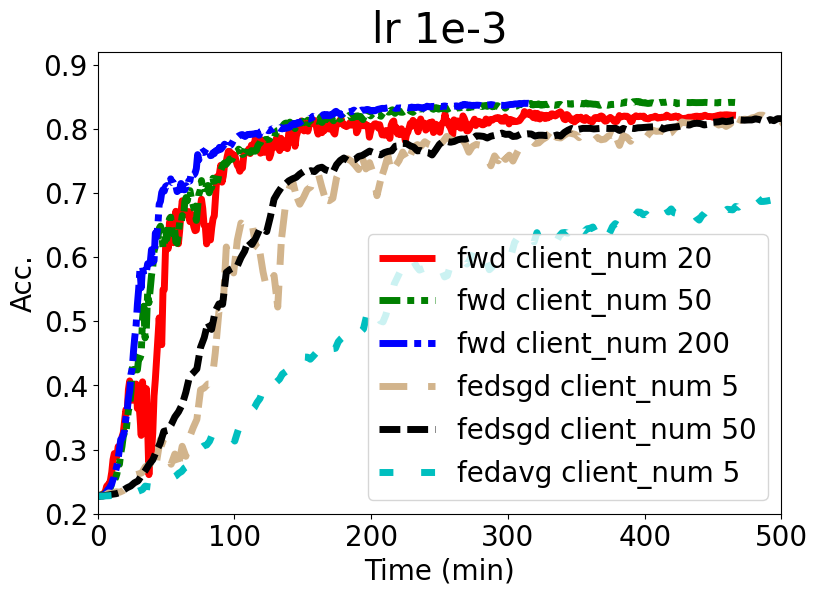

In [4]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 5
bwd_num_client_list = [5, 50]
fwd_num_client_list = [20,50, 200]
model_list = ["vgg16"]
freeze_layers = ["e", "e,0", "e,0,1", "e,0,1,2", "e,0,1,2,3", "e,0,1,2,3,4", "e,0,1,2,3,4,5"]
# normal_method_list = ["kaiming_normal", "xavier_normal"]
learning_rate_list = ["1e-3"]
for model in model_list:
    # for method in normal_method_list:
    k = 1
    plt.figure(figsize=(30, 6),dpi=100)
    for lr in learning_rate_list:
        plt.subplot(1,3,k)
        k += 1
        acc_lists = []
        for i,client_num in enumerate(fwd_num_client_list):
            acc = []
            with open(f"forward_lr{lr}_client_num_{client_num}.log","r") as f:
                log = f.readlines()
                for l in log:
                    if "'acc':" in l:
                        acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                    # if len(acc)>200:
                    #     break
            plt.plot([t*fwdgrad_time_per_round for t in range(len(acc))], acc, linestyle=linestyle[i], color=colors[i],label=f"fwd client_num {client_num}",linewidth=lw)
        for i,client_num in enumerate(bwd_num_client_list):
            with open(f"fedsgd_lr{lr}_client_num_{client_num}.log","r") as f:
                log = f.readlines()
                acc = []
                for l in log:
                    if "'acc':" in l:
                        acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                    # if len(acc)>600:
                    #     break
                plt.plot([t*fedsgd_time_per_round for t in range(len(acc))], acc, linestyle=linestyle[-i-1], color=colors[-i-1],label=f"fedsgd client_num {client_num}",linewidth=lw)
        acc = []
        with open(f"fedavg_lr{lr}_client_num_5.log","r") as f:
            log = f.readlines()
            for l in log:
                if "'acc':" in l:
                    acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                if len(acc)>500:
                    break
        plt.plot([t*fedavg_time_per_round for t in range(len(acc))], acc, linestyle=linestyle[4], color=colors[4],label=f"fedavg client_num 5",linewidth=lw)
        
        plt.xlabel("Time (min)",fontsize=20)
        plt.ylabel("Acc.",fontsize=20)
        plt.xticks(size = 20)
        plt.xlim(0,500)
        plt.yticks(size = 20)
        plt.ylim(0.2,0.92)
        plt.legend(fontsize=20)
        plt.title(f"lr {lr}",fontsize=30)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")


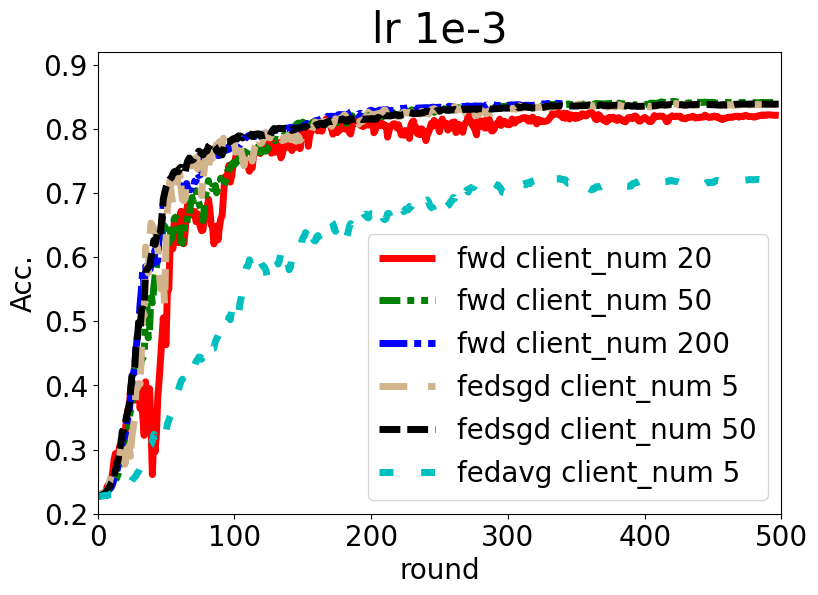

In [5]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 5
bwd_num_client_list = [5, 50]
fwd_num_client_list = [20,50, 200]
model_list = ["vgg16"]
freeze_layers = ["e", "e,0", "e,0,1", "e,0,1,2", "e,0,1,2,3", "e,0,1,2,3,4", "e,0,1,2,3,4,5"]
# normal_method_list = ["kaiming_normal", "xavier_normal"]
learning_rate_list = ["1e-3"]
for model in model_list:
    # for method in normal_method_list:
    k = 1
    plt.figure(figsize=(30, 6),dpi=100)
    for lr in learning_rate_list:
        plt.subplot(1,3,k)
        k += 1
        acc_lists = []
        for i,client_num in enumerate(fwd_num_client_list):
            acc = []
            with open(f"forward_lr{lr}_client_num_{client_num}.log","r") as f:
                log = f.readlines()
                for l in log:
                    if "'acc':" in l:
                        acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                    # if len(acc)>200:
                    #     break
            plt.plot([t for t in range(len(acc))], acc, linestyle=linestyle[i], color=colors[i],label=f"fwd client_num {client_num}",linewidth=lw)
        for i,client_num in enumerate(bwd_num_client_list):
            with open(f"fedsgd_lr{lr}_client_num_{client_num}.log","r") as f:
                log = f.readlines()
                acc = []
                for l in log:
                    if "'acc':" in l:
                        acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                    # if len(acc)>600:
                    #     break
                plt.plot([t for t in range(len(acc))], acc, linestyle=linestyle[-i-1], color=colors[-i-1],label=f"fedsgd client_num {client_num}",linewidth=lw)
        acc = []
        with open(f"fedavg_lr{lr}_client_num_5.log","r") as f:
            log = f.readlines()
            for l in log:
                if "'acc':" in l:
                    acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                if len(acc)>500:
                    break
        plt.plot([t for t in range(len(acc))], acc, linestyle=linestyle[4], color=colors[4],label=f"fedavg client_num 5",linewidth=lw)
        
        plt.xlabel("round",fontsize=20)
        plt.ylabel("Acc.",fontsize=20)
        plt.xticks(size = 20)
        plt.xlim(0,500)
        plt.yticks(size = 20)
        plt.ylim(0.2,0.92)
        plt.legend(fontsize=20)
        plt.title(f"lr {lr}",fontsize=30)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")
